# Finding Anomalies in Data

Generate random data and import required libraries

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import researchpy as rp
seed = np.random.seed(1)

In [31]:
# Multiply and add by random numbers
np.random.seed(seed)
data = np.random.rand(50000) * 20 + 20
print(rp.summarize(data))

       N     Mean     Median Variance      SD      SE  95% Conf. Interval
0  50000  29.9866  30.031641   33.465  5.7849  0.0259  [29.9359, 30.0373]


Detecting Anomalies in Data

In [32]:
def find_anomalies(data):
    anomalies = []

    # Upper and lower bounds
    random_data_std  = np.std(data)
    random_data_mean = np.mean(data)
    anomaly_cut_off = random_data_std * 3

    lower_bound = random_data_mean- anomaly_cut_off
    upper_bound = random_data_mean + anomaly_cut_off
    print(f"Lower bound: {round(lower_bound, 4)}")

    # Generate outliner
    for outlier in data:
        if outlier > upper_bound or outlier < lower_bound:
            anomalies.append(outlier)
    return anomalies

find_anomalies(data)


Lower bound: 12.6321


[]

## Data visualization
Plot the box-and-whisker plot to identify the skewness and kurtosis of the data

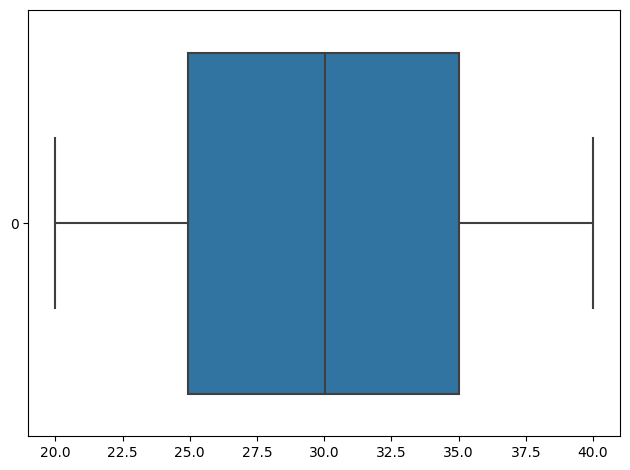

In [33]:
import seaborn as sns
sns.boxplot(data=data, orient="h")
plt.tight_layout()

## Clustering
DBScan Clustering Using DBScan Clustering Algorithm.
[DB Scan Clustering Algorithm](https://scikit-learn.org/stable/modules/generated/sklearnstackoverflow.com/questions/34394641/dbscan-clustering-what-happens-when-border-point-of-one-cluster-is-considered)

In [34]:
from sklearn.cluster import DBSCAN
random_data = data

outlier_detection = DBSCAN(min_samples=2, eps=3)
clusters = outlier_detection.fit_predict(random_data)
no_of_clusters = list(clusters).count(-1)
print("Number of Clusters: ", no_of_clusters)

Number of Clusters:  118


## Isolation Forest
Isolation Forest is an unsupervised decision tree algorithm that is used to find subsampling. Invented by **Monash University** and **Nan Jing University**. This algorithm is extremely powerful in high dimensional data.<br>
[Originated here](https://ieeexplore.ieee.org/document/4781136)
[Paper from Nan Jing University](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf)

This algorithm will output the prediction value of each data, if the result is -1, it means that the data is an anomaly data. If it is 1, then the data is not an anomaly data.

In [37]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=100, random_state=1, contamination='auto')
predictions = clf.fit_predict(random_data)
predictions


array([-1, -1,  1, ...,  1,  1, -1])

## Robust Random Cut Forest
Robust Random Cut Forest is an unsupervised algorithm used by amazon to detect anomaly data. It uses Association-based Anomaly Criterion to identify which data is an anomaly data, the higher the criterion, the higher probability that the data is an anomaly data. <br>

Please note that the definition of 'high' and 'low' depends on the application of the algorithm.<br>

[The Paper](http://proceedings.mlr.press/v48/guha16.pdf)<br>
[Explaination](https://www.youtube.com/watch?v=yx1vf3uapX8) <br>

The biggest advantage of the algorithm is that it can deal with data that are with a very high dimensions, it can also deal with live-streaming data (with integrated AWS kinesis Analytics), and offline data.<br>

The complete code example can be found [here](https://github.com/aws/amazon-sagemaker-examples/blob/main/introduction_to_amazon_algorithms/random_cut_forest/random_cut_forest.ipynb)
